Updated to qiskit version 1.0 (Mars 2024)

## Basic Qiskit Syntax

### Quantum circuits

L'objet au cœur de Qiskit est le circuit quantique. Voici comment nous en créons un, que nous appellerons `qc`

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit()

Ce circuit est actuellement complètement vide, sans qubits ni sorties.

### Quantum registers

Pour rendre le circuit moins trivial, nous devons définir un registre de qubits. Cela se fait à l'aide d'un objet QuantumRegister. Par exemple, définissons un registre composé de deux qubits et appelons-le `qr`.

In [2]:
from qiskit import QuantumRegister
qr = QuantumRegister(2,'a')

Lui donner le label `'a'` est optionel.
Nous pouvons maintenant l'ajouter au circuit en utilisant la méthode `add_register`, et voir qu'il a été ajouté en vérifiant la variable `qregs` de l'objet circuit. Ce guide utilise des [Jupyter Notebooks](https://jupyter.org/). Dans Jupyter Notebooks, le résultat de la dernière ligne d'une cellule est affiché sous la cellule :

In [3]:
qc.add_register( qr )

qc.qregs

[QuantumRegister(2, 'a')]

Maintenant que notre circuit a quelques qubits, nous pouvons utiliser un autre attribut du circuit pour voir à quoi il ressemble : `draw()` .

In [4]:
qc.draw()

a_0: 
     
a_1:

Nos qubits sont prêts à commencer leur voyage, mais sont actuellement simplement là, dans l'état $\left|0\right\rangle$.

#### Applying Gates

Pour que quelque chose se produise, nous devons ajouter des portes. Par exemple, essayons `h()`.

In [6]:
qc.h()

TypeError: QuantumCircuit.h() missing 1 required positional argument: 'qubit'

Ici, nous avons eu une erreur, car nous n'avons pas indiqué à l'opération sur quel qubit elle devait agir. Les deux qubits de notre registre `qr` peuvent être adressés individuellement comme `qr[0]` and `qr[1]`.

In [9]:
qc.h(qr[0])

Ignorez la sortie ci-dessus. Lorsque la dernière ligne d'une cellule n'a pas de `=`, les notebooks Jupyter aiment imprimer ce qui s'y trouve. Dans ce cas, cela nous indique qu'il existe une Hadamard telle que définie par Qiskit. Pour supprimer cette sortie, nous pourrions utiliser un `;`.

Nous pouvons également ajouter un NON contrôlé en utilisant `cx`. Cela nécessite deux arguments : le qubit de contrôle, puis le qubit cible.

In [10]:
qc.cx(qr[0], qr[1])

Maintenant voila notre circuit

In [11]:
qc.draw()

┌───┐┌───┐┌───┐     
a_0: ┤ H ├┤ H ├┤ H ├──■──
     └───┘└───┘└───┘┌─┴─┐
a_1: ───────────────┤ X ├
                    └───┘

### Aer simulator

Nous sommes maintenant au stade où nous pouvons réellement examiner une sortie du circuit. Plus précisément, nous utiliserons le « simulateur aer » pour voir ce qui arrive au vecteur d'état des deux qubits.

Pour préparer ce simulateur, nous utilisons la ligne suivante.


In [13]:
from qiskit_aer import Aer
sv_sim = Aer.get_backend('aer_simulator')

Dans Qiskit, nous utilisons le backend pour faire référence aux éléments sur lesquels les programmes quantiques s'exécutent réellement (simulateurs ou véritables appareils quantiques). Pour configurer une tâche pour un backend, nous devons configurer l'objet backend correspondant.

Le simulateur que nous souhaitons est défini dans la partie de qiskit connue sous le nom d'`Aer`. En donnant le nom du simulateur souhaité à la méthode `get_backend()` d'Aer, nous obtenons l'objet backend dont nous avons besoin. Dans ce cas, le nom est `'aer_simulator'`.

Une liste de tous les simulateurs possibles dans Aer peut être trouvée en utilisant

In [14]:
for backend in Aer.backends():
    print(backend)

AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
QasmSimulator('qasm_simulator')
StatevectorSimulator('statevector_simulator')
UnitarySimulator('unitary_simulator')


Tous ces simulateurs sont « locaux », c'est-à-dire qu'ils fonctionnent sur la machine sur laquelle Qiskit est installé. Leur utilisation sur votre propre ordinateur peut être effectuée sans signer le contrat d'utilisation d'IBMQ.

Nous utilisons ensuite la méthode `.run()` du backend que nous souhaitons utiliser (dans ce cas un simulateur) pour exécuter l'expérience. C’est là que se produisent les calculs quantiques !

In [15]:
qc.save_statevector()
job = sv_sim.run(qc)

This creates an object that handles the job, which here has been called `job`. All we need from this is to extract the result. Specifically, we want the state vector.

In [16]:
ket = job.result().get_statevector()
print(ket)

Statevector([0.70710678+0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.70710678-8.65956056e-17j],
            dims=(2, 2))


C'est le Vecteur pour un etat de Bell $\left( \left|00\right\rangle + \left|11\right\rangle \right)/\sqrt{2}$, c'est ce à quoi nous nous attendrions étant donné le circuit.

Bien que nous ayons un vecteur d'état bien défini, nous pouvons montrer une autre fonctionnalité de Qiskit : il est possible d'initialiser un circuit avec un état pur arbitraire.

In [17]:
new_qc = QuantumCircuit(qr)

new_qc.initialize(ket, qr)

### Classical registers and the Aer simulator

Dans la simulation ci-dessus, nous avons obtenu un vecteur d'état. Ce n’est pas ce que nous obtiendrons d’un véritable ordinateur quantique. Pour cela, nous avons besoin de mesures. Et pour gérer les mesures, nous devons définir où iront les résultats. Cela se fait avec un `ClassicalRegister`. Définissons un registre classique à deux bits, afin de mesurer nos deux qubits.

In [18]:
from qiskit import ClassicalRegister
cr = ClassicalRegister(2,'creg')

qc.add_register(cr)

Nous pouvons maintenant utiliser la méthode de `mesure` du circuit quantique. Cela nécessite deux arguments : le qubit mesuré et le bit sur lequel le résultat est écrit.

Mesurons les deux qubits et écrivons leurs résultats dans différents bits.

In [19]:
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])

qc.draw()

┌───┐┌───┐┌───┐      statevector ┌─┐   
   a_0: ┤ H ├┤ H ├┤ H ├──■────────░──────┤M├───
        └───┘└───┘└───┘┌─┴─┐      ░      └╥┘┌─┐
   a_1: ───────────────┤ X ├──────░───────╫─┤M├
                       └───┘      ░       ║ └╥┘
creg: 2/══════════════════════════════════╩══╩═
                                          0  1

Nous pouvons maintenant exécuter cela sur un simulateur local dont l’effet est d’émuler un véritable appareil quantique. Pour cela, nous devons ajouter une autre entrée `shots`, qui détermine combien de fois nous exécutons le circuit pour prendre des statistiques. Si vous ne fournissez aucune valeur `shots`, vous obtenez la valeur par défaut de 1024.


In [20]:
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc, shots=8192)

Le résultat est essentiellement un histogramme sous la forme d’un dictionnaire Python. Nous pouvons utiliser `print` pour afficher cela pour nous.

In [21]:
hist = job.result().get_counts()
print(hist)

{'00': 4195, '11': 3997}


Nous pouvons même demander à Qiskit de le tracer sous forme d'histogramme.

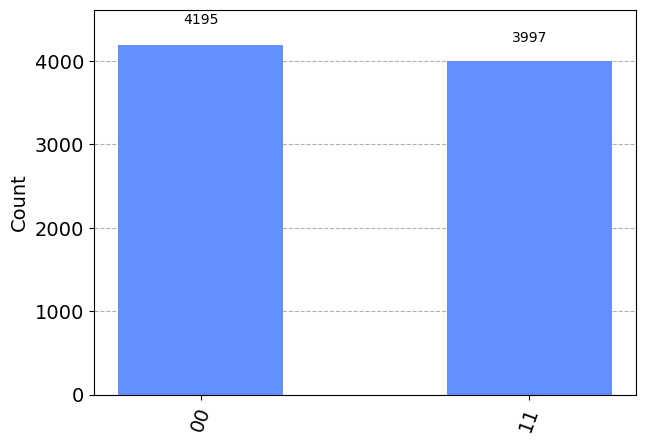

In [22]:
from qiskit.visualization import plot_histogram

plot_histogram(hist)

Pour les backends compatibles, nous pouvons également demander et obtenir la liste ordonnée des résultats.

In [23]:
job = aer_sim.run(qc, shots=10, memory=True)
samples = job.result().get_memory()
print(samples)

['11', '11', '00', '11', '00', '00', '00', '11', '00', '00']


Notez que les bits sont étiquetés de droite à gauche. Donc `cr[0]` est celui le plus à droite, et ainsi de suite. À titre d'exemple, voici un circuit de 8 qubits avec un Pauli $X$ sur uniquement le qubit numéroté `7`, dont la sortie est stockée dans le bit numéroté `7`.

In [24]:
qubit = QuantumRegister(8)
bit = ClassicalRegister(8)
qc_2 = QuantumCircuit(qubit,bit)

qc_2.x(qubit[7])
qc_2.measure(qubit,bit) # this is a way to do all the qc.measure(qr8[j],cr8[j]) at once
# or you can use qc_2.measure_all()

aer_sim.run(qc_2, shots=8192).result().get_counts()

{'10000000': 8192}

Le « 1 » apparaît à gauche.

Cette numérotation reflète le rôle des bits lorsqu'ils représentent un nombre entier.


$$ b_{n-1} ~ b_{n-2} ~ \ldots ~ b_1 ~ b_0 = \sum_j ~ b_j ~ 2^j $$

Ainsi, la chaîne que nous obtenons dans notre résultat est le binaire pour $2^7$ car elle a un `1` pour le bit numéroté `7`


### Notation simplifiée

Plusieurs registres quantiques et classiques peuvent être ajoutés à un circuit. Cependant, si nous n’en avons besoin que d’un de chaque, nous pouvons utiliser une notation simplifiée.

Par exemple, considérons ce qui suit.

In [25]:
qc = QuantumCircuit(3)

L'unique argument de `QuantumCircuit` est interprété comme le nombre de qubits souhaités. Ce circuit possède donc un seul registre quantique composé de trois qubits, et aucun registre classique.

Lors de l'ajout de portes, on peut alors faire référence aux trois qubits simplement par leur index : 0, 1 ou 2. Par exemple, voici un Hadamard sur le qubit 1.

In [26]:
qc.h(1)

qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘
q_2: ─────

Pour définir un circuit avec des registres à la fois quantiques et classiques, nous pouvons fournir deux arguments à `QuantumCircuit`. Le premier sera interprété comme le nombre de qubits, et le second sera le nombre de bits. Par exemple, voici un circuit à deux qubits pour lequel nous prendrons un seul bit de sortie.

In [27]:
qc = QuantumCircuit(2,1)

Pour voir cela en action, voici un circuit simple. A noter que, lors d'une mesure, on se réfère également aux bits du registre classique par index.

In [28]:
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)

qc.draw()

┌───┐        
q_0: ┤ H ├──■─────
     └───┘┌─┴─┐┌─┐
q_1: ─────┤ X ├┤M├
          └───┘└╥┘
c: 1/═══════════╩═
                0

### Creation de "custom gates"

Comme nous l'avons vu, il est possible de combiner différents circuits pour en faire des plus grands. Nous pouvons également en utiliser une version plus sophistiquée pour réaliser des portails personnalisés. Par exemple, voici un circuit qui implémente un `cx` entre les qubits 0 et 2, en utilisant le qubit 1 pour arbitrer le processus.

In [29]:
sub_circuit = QuantumCircuit(3, name='toggle_cx')
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)

sub_circuit.draw()

q_0: ──■─────────■───────
     ┌─┴─┐     ┌─┴─┐     
q_1: ┤ X ├──■──┤ X ├──■──
     └───┘┌─┴─┐└───┘┌─┴─┐
q_2: ─────┤ X ├─────┤ X ├
          └───┘     └───┘

Nous pouvons maintenant transformer cela en porte

In [30]:
toggle_cx = sub_circuit.to_instruction()

puis insérez-le dans d'autres circuits en utilisant n'importe quel ensemble de qubits que nous choisissons


In [31]:
qr = QuantumRegister(4)
new_qc = QuantumCircuit(qr)

new_qc.append(toggle_cx, [qr[1],qr[2],qr[3]])

new_qc.draw()

q2_0: ──────────────
      ┌────────────┐
q2_1: ┤0           ├
      │            │
q2_2: ┤1 toggle_cx ├
      │            │
q2_3: ┤2           ├
      └────────────┘

### Acces a un backend hardware 

Backend objects can also be set up using the `IBMQ` package. The use of these requires us to [sign with an IBMQ account](https://qiskit.org/documentation/install.html#access-ibm-q-systems). Assuming the credentials are already loaded onto your computer, you sign in with

Les objets backend peuvent également être configurés à l'aide du package « IBMQ ». L'utilisation de ceux-ci nous oblige à [signer avec un compte IBMQ](https://qiskit.org/documentation/install.html#access-ibm-q-systems). En supposant que les informations d'identification sont déjà chargées sur votre ordinateur, vous vous connectez avec

In [33]:
from qiskit_ibm_provider import IBMProvider
# provider = IBMProvider(token='Your token')

Voyons maintenant de quels backends supplémentaires nous disposons.

In [34]:
provider = IBMProvider(instance='ibm-q/open/main')
for backend in provider.backends():
    print(backend)

<IBMBackend('ibmq_qasm_simulator')>
<IBMBackend('simulator_extended_stabilizer')>
<IBMBackend('simulator_mps')>
<IBMBackend('simulator_statevector')>
<IBMBackend('simulator_stabilizer')>
<IBMBackend('ibm_brisbane')>
<IBMBackend('ibm_kyoto')>
<IBMBackend('ibm_osaka')>


Nous pouvons voir ce qu'ils font avec la méthode `status()`

In [35]:
for backend in provider.backends():
    print(backend.status().to_dict())

{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_extended_stabilizer', 'backend_version': '', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_mps', 'backend_version': '', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_statevector', 'backend_version': '', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_stabilizer', 'backend_version': '', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'ibm_brisbane', 'backend_version': '', 'operational': True, 'pending_jobs': 1187, 'status_msg': 'active'}
{'backend_name': 'ibm_kyoto', 'backend_version': '', 'operational': True, 'pending_jobs': 1237, 'status_msg': 'active'}
{'backend_name': 'ibm_osaka', 'backend_version': '', 'operational': True, 'pending_jobs': 615, 'status_msg': 'activ

Obtenons l'objet backend pour `Brisbane`

In [36]:
real_device = provider.get_backend('ibm_brisbane')

Nous pouvons l'utiliser pour exécuter une tâche sur l'appareil exactement de la même manière que pour l'émulateur.

On peut également extraire certaines de ses propriétés.

In [37]:
properties = real_device.properties()
coupling_map = real_device.configuration().coupling_map

À partir de là, nous pouvons construire un modèle de bruit pour imiter le bruit sur l'appareil (nous discuterons des modèles de bruit plus loin dans le manuel). 

In [41]:
from qiskit_ibm_runtime.fake_provider import FakeAthens
athens = FakeAthens()

Et puis exécutez le travail sur l'émulateur, en reproduisant toutes ces fonctionnalités du périphérique réel. Voici un exemple avec un circuit qui devrait produire `'10'` dans le cas silencieux.

In [42]:
qc = QuantumCircuit(5,5)
qc.x(0)
for q in range(4):
    qc.cx(0,q+1)
qc.measure_all()
qc.draw()

┌───┐                     ░ ┌─┐            
   q_0: ┤ X ├──■────■────■────■───░─┤M├────────────
        └───┘┌─┴─┐  │    │    │   ░ └╥┘┌─┐         
   q_1: ─────┤ X ├──┼────┼────┼───░──╫─┤M├─────────
             └───┘┌─┴─┐  │    │   ░  ║ └╥┘┌─┐      
   q_2: ──────────┤ X ├──┼────┼───░──╫──╫─┤M├──────
                  └───┘┌─┴─┐  │   ░  ║  ║ └╥┘┌─┐   
   q_3: ───────────────┤ X ├──┼───░──╫──╫──╫─┤M├───
                       └───┘┌─┴─┐ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ────────────────────┤ X ├─░──╫──╫──╫──╫─┤M├
                            └───┘ ░  ║  ║  ║  ║ └╥┘
   c: 5/═════════════════════════════╬══╬══╬══╬══╬═
                                     ║  ║  ║  ║  ║ 
meas: 5/═════════════════════════════╩══╩══╩══╩══╩═
                                     0  1  2  3  4

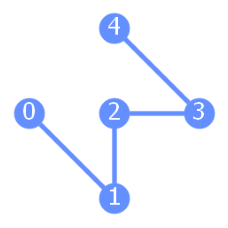

In [43]:
from qiskit.visualization import plot_gate_map
plot_gate_map(athens)

In [44]:
from qiskit import transpile
t_qc = transpile(qc, athens)
t_qc.draw()

┌───┐           ░          ┌─┐»
q_4 -> 0 ─────────────────────────────────────■──┤ X ├──■────────░──────────┤M├»
                                       ┌───┐┌─┴─┐└─┬─┘┌─┴─┐┌───┐ ░          └╥┘»
q_3 -> 1 ──────────────────────────────┤ X ├┤ X ├──■──┤ X ├┤ X ├─░───────────╫─»
         ┌───┐                         └─┬─┘└───┘     └───┘└─┬─┘ ░ ┌─┐       ║ »
q_0 -> 2 ┤ X ├──■───────────────────■────■───────────────────■───░─┤M├───────╫─»
         └───┘┌─┴─┐┌───┐     ┌───┐┌─┴─┐                          ░ └╥┘   ┌─┐ ║ »
q_1 -> 3 ─────┤ X ├┤ X ├──■──┤ X ├┤ X ├──────────────────────────░──╫────┤M├─╫─»
              └───┘└─┬─┘┌─┴─┐└─┬─┘└───┘                          ░  ║ ┌─┐└╥┘ ║ »
q_2 -> 4 ────────────■──┤ X ├──■─────────────────────────────────░──╫─┤M├─╫──╫─»
                        └───┘                                    ░  ║ └╥┘ ║  ║ »
    c: 5/═══════════════════════════════════════════════════════════╬══╬══╬══╬═»
                                                                    ║  ║  ║  ║ »
 meas: 5/═══════════════════════════════════════════════════════════╩══╩══╩══╩═»
                                                                    0  1  2  3 »
«            
«q_4 -> 0 ───
«         ┌─┐
«q_3 -> 1 ┤M├
«         └╥┘
«q_0 -> 2 ─╫─
«          ║ 
«q_1 -> 3 ─╫─
«          ║ 
«q_2 -> 4 ─╫─
«          ║ 
«    c: 5/═╬═
«          ║ 
« meas: 5/═╩═
«          4

Maintenant que les bases ont été couvertes, apprenons-en davantage sur ce que sont les qubits et les circuits quantiques.

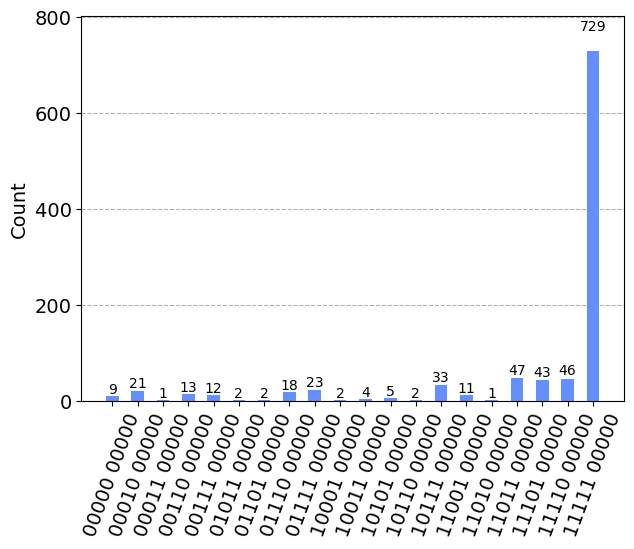

In [45]:
counts = athens.run(t_qc).result().get_counts()
plot_histogram(counts)

In [56]:
from qiskit.version import __version__, __package__
print(
__package__ , __version__
)

qiskit 1.0.1
